# This notebook is created a part of Coventry University's Machine Learning Coursework - 7072CEM
Dataset is accessible on https://www.kaggle.com/zynicide/wine-reviews

By Sunggu Choi

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.linear_model import LinearRegression

import seaborn as sns
sns.set_theme(style="ticks", color_codes=True)

In [9]:
dataset = pd.read_csv('winemag_unlabeled.csv')

In [10]:
dataset.shape

(129971, 11)

In [11]:
dataset.head()


,country,designation,points,price,province,region_1,region_2,taster_name,title,variety,winery
0,Italy,Vulkà Bianco,87,0.0,Sicily & Sardinia,Etna,Other,Kerin O’Keefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,Avidagos,87,15.0,Douro,Other,Other,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,Other,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,Other,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [12]:
dataset.describe()

,points,price
count,129971.000000,129971.000000
mean,88.447138,32.915697
std,3.039730,40.582167
min,80.000000,0.000000
25%,86.000000,15.000000
50%,88.000000,25.000000
75%,91.000000,40.000000
max,100.000000,3300.000000


In [13]:
dataset.country.describe()

count     129971
unique        44
top           US
freq       54504
Name: country, dtype: object

In [14]:
dataset['country'].value_counts()[:]

US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Other                        63
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine 

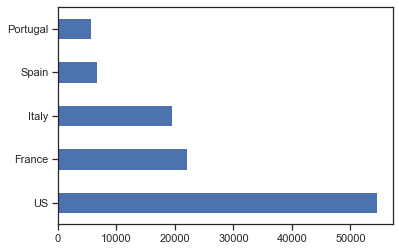

In [15]:
dataset['country'].value_counts()[:5].plot(kind='barh')

Variety of wines

<Figure size 720x720 with 0 Axes>

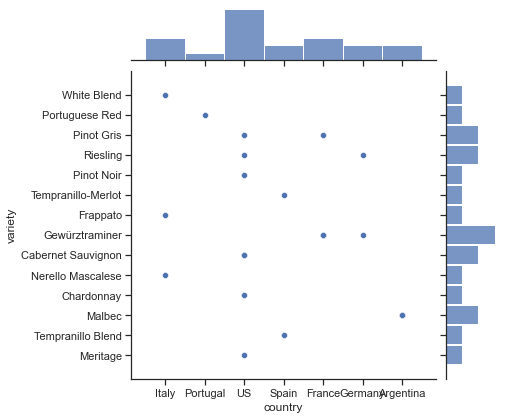

In [27]:
plt.figure(figsize=(10,10))
sns.jointplot(x='country',y='variety',data=dataset[:20])

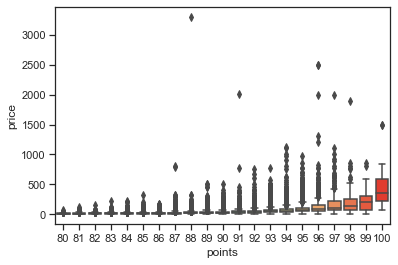

In [17]:
sns.boxplot(x='points',y='price',data=dataset,palette='rainbow')

Text(0.5, 1.0, 'wine.corr()')

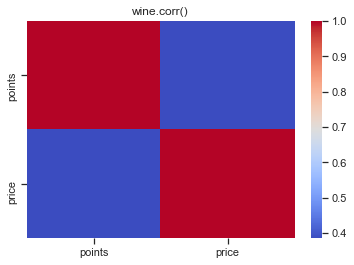

In [18]:
sns.heatmap(dataset.corr(),cmap='coolwarm')
plt.title('wine.corr()')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


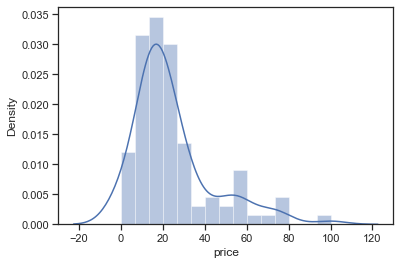

In [19]:
sns.distplot(dataset[:100]['price']);

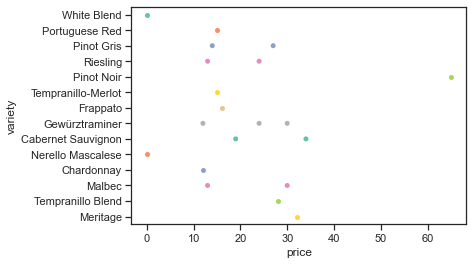

In [20]:
sns.swarmplot(x='price',y='variety',data=dataset[:20],palette='Set2')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


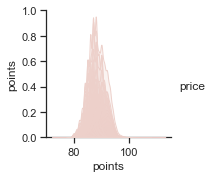

In [21]:
sns.pairplot(dataset,hue='price')

/Users/sungguchoi/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


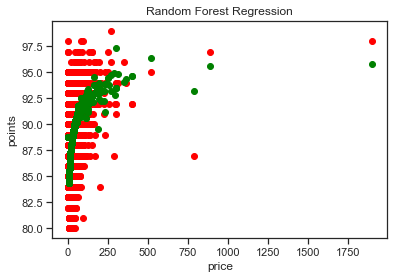

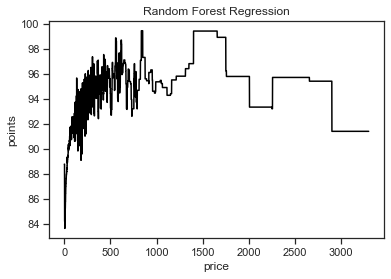

In [22]:
X = dataset['price'].values
y = dataset['points'].values


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05)

# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 20, random_state = 0)
regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

y_pred = regressor.predict(X_test.reshape(-1,1))
y_pred

df = pd.DataFrame({'Real Values':y_test.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
df

# # Visualising the Random Forest Regression Results  
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test, y_test, color = 'red')
plt.scatter(X_test, y_pred, color = 'green')
plt.title('Random Forest Regression')
plt.xlabel('price')
plt.ylabel('points')
plt.show()

plt.plot(X_grid, regressor.predict(X_grid), color = 'black')
plt.title('Random Forest Regression')
plt.xlabel('price')
plt.ylabel('points')
plt.show()
